In [64]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# List of dictionaries to store
dicts_to_store = {
    'results_pfl_no_fair': 1,
    'results_pfl_with_fair': 1,
    'results_dfl_no_fair': 1,
    'results_dfl_with_fair': 1,
    'results_dfl_with_fair_fin_diff_1': 1,
    'results_dfl_with_fair_fin_diff_2': 1,
    'time_results_findiff_solver': 1,
    'time_results_findiff_cf': 1
}

# Load dictionaries from local files
loaded_dicts = {}
for name in dicts_to_store.keys():
    with open(f'alpha-2/{name}.pkl', 'rb') as f:
        loaded_dicts[name] = pickle.load(f)

# Access loaded dictionaries
results_pfl_no_fair = loaded_dicts['results_pfl_no_fair']
results_pfl_with_fair = loaded_dicts['results_pfl_with_fair']
results_dfl_no_fair = loaded_dicts['results_dfl_no_fair']
results_dfl_with_fair = loaded_dicts['results_dfl_with_fair']
results_dfl_with_fair_fin_diff_1 = loaded_dicts['results_dfl_with_fair_fin_diff_1']
results_dfl_with_fair_fin_diff_2 = loaded_dicts['results_dfl_with_fair_fin_diff_2']
time_results_findiff_solver = loaded_dicts['time_results_findiff_solver']
time_results_findiff_cf = loaded_dicts['time_results_findiff_cf']

In [65]:
results_dfl_no_fair

{'mean_train_loss': array([87294.6265625 , 80657.41328125, 75339.90703125, 70905.9953125 ,
        67118.23945313, 63535.22890625, 60649.12890625, 57602.96640625,
        55036.55625   , 52324.09453125, 49879.5421875 , 48159.99726563,
        46107.0703125 , 44689.37265625, 42980.76640625, 41398.91523438,
        40230.12304688, 39387.57070312, 38929.7375    , 39030.36835938,
        38195.83046875, 38984.93945312, 38789.0984375 , 39922.90820312,
        40304.884375  , 42365.278125  , 43864.87734375, 46079.92617187,
        48904.00625   , 52208.66757813, 55670.15507812, 57688.01796875,
        58428.1703125 , 55555.93828125, 53508.4828125 , 49607.64414063,
        46468.22421875, 44340.00664062, 42377.52851563, 41283.2984375 ,
        40600.81132812, 39039.86601562, 38545.89609375, 37163.27578125,
        35478.85898438, 35076.86328125, 32810.46230469, 32935.25957031,
        31966.13671875, 31664.9078125 ]),
 'mean_test_regret': array([15.20919561, 14.02612391, 13.03909464, 12.17282

In [66]:
import pandas as pd

# Extract summary data for each method
methods = ['2-Stage', '2-Stage', 'FDFL (Closed-Form)', 'FDFL (Closed-Form)', 'FDFL (DBB)', 'FDFL (DBB)']
lambdas = ['0', '1', '0', '1', '0', '1']

# Combine all results into a summary
data = {
    'Method': methods,
    '$\lambda$': lambdas,
    'MSE (Mean ± Std)': [
        f"{results_pfl_no_fair['mean_test_mse'][-1]:.2f} ± {results_pfl_no_fair['std_test_mse'][-1]:.2f}",
        f"{results_pfl_with_fair['mean_test_mse'][-1]:.2f} ± {results_pfl_with_fair['std_test_mse'][-1]:.2f}",
        f"{results_dfl_no_fair['mean_test_mse'][-1]:.2f} ± {results_dfl_no_fair['std_test_mse'][-1]:.2f}",
        f"{results_dfl_with_fair['mean_test_mse'][-1]:.2f} ± {results_dfl_with_fair['std_test_mse'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_test_mse'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_1['std_test_mse'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_test_mse'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_2['std_test_mse'][-1]:.2f}"
    ],
    'Regret (Mean ± Std)': [
        f"{results_pfl_no_fair['mean_test_regret'][-1]:.2f} ± {results_pfl_no_fair['std_test_regret'][-1]:.2f}",
        f"{results_pfl_with_fair['mean_test_regret'][-1]:.2f} ± {results_pfl_with_fair['std_test_regret'][-1]:.2f}",
        f"{results_dfl_no_fair['mean_test_regret'][-1]:.2f} ± {results_dfl_no_fair['std_test_regret'][-1]:.2f}",
        f"{results_dfl_with_fair['mean_test_regret'][-1]:.2f} ± {results_dfl_with_fair['std_test_regret'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_test_regret'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_1['std_test_regret'][-1]:.2f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_test_regret'][-1]:.2f} ± {results_dfl_with_fair_fin_diff_2['std_test_regret'][-1]:.2f}"
    ],
    'Fairness (Mean ± Std)': [
        f"{results_pfl_no_fair['mean_test_fair'][-1]:.3f} ± {results_pfl_no_fair['std_test_fair'][-1]:.3f}",
        f"{results_pfl_with_fair['mean_test_fair'][-1]:.3f} ± {results_pfl_with_fair['std_test_fair'][-1]:.3f}",
        f"{results_dfl_no_fair['mean_test_fair'][-1]:.3f} ± {results_dfl_no_fair['std_test_fair'][-1]:.3f}",
        f"{results_dfl_with_fair['mean_test_fair'][-1]:.3f} ± {results_dfl_with_fair['std_test_fair'][-1]:.3f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_test_fair'][-1]:.3f} ± {results_dfl_with_fair_fin_diff_1['std_test_fair'][-1]:.3f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_test_fair'][-1]:.3f} ± {results_dfl_with_fair_fin_diff_2['std_test_fair'][-1]:.3f}"
    ],
    'Time/Epoch': [
        f"{results_pfl_no_fair['mean_time']:.2f} ± {results_pfl_no_fair['std_time']:.2f}",
        f"{results_pfl_with_fair['mean_time']:.2f} ± {results_pfl_with_fair['std_time']:.2f}",
        f"{results_dfl_no_fair['mean_time']:.2f} ± {results_dfl_no_fair['std_time']:.2f}",
        f"{results_dfl_with_fair['mean_time']:.2f} ± {results_dfl_with_fair['std_time']:.2f}",
        f"{results_dfl_with_fair_fin_diff_1['mean_time']:.2f} ± {results_dfl_with_fair_fin_diff_1['std_time']:.2f}",
        f"{results_dfl_with_fair_fin_diff_2['mean_time']:.2f} ± {results_dfl_with_fair_fin_diff_2['std_time']:.2f}"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Export the DataFrame to LaTeX
latex_table = df.to_latex(index=False, column_format='lcccccc', 
                         caption=' model Results $\\alpha= $', 
                         label='tab:results')

print(latex_table)

\begin{table}
\caption{ model Results $\alpha= $}
\label{tab:results}
\begin{tabular}{lcccccc}
\toprule
Method & $\lambda$ & MSE (Mean ± Std) & Regret (Mean ± Std) & Fairness (Mean ± Std) & Time/Epoch \\
\midrule
2-Stage & 0 & 15.53 ± 1.86 & 10.59 ± 0.55 & 11.106 ± 6.060 & 0.33 ± 0.03 \\
2-Stage & 1 & 19.30 ± 2.72 & 10.71 ± 0.80 & 1.205 ± 1.087 & 0.31 ± 0.03 \\
FDFL (Closed-Form) & 0 & 26.26 ± 1.42 & 1.23 ± 0.45 & 17.040 ± 7.380 & 1.32 ± 0.12 \\
FDFL (Closed-Form) & 1 & 25.81 ± 1.70 & 1.21 ± 0.43 & 16.238 ± 6.881 & 1.29 ± 0.17 \\
FDFL (DBB) & 0 & 43.67 ± 3.69 & 5.61 ± 0.50 & 31.589 ± 15.180 & 21.49 ± 0.76 \\
FDFL (DBB) & 1 & 44.26 ± 4.20 & 5.54 ± 0.87 & 32.181 ± 15.147 & 21.45 ± 1.29 \\
\bottomrule
\end{tabular}
\end{table}



In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
labels = [
    '2-Stage', 
    '2-Stage with Fair', 
    'FDFL (Closed-Form)', 
    'FDFL (Closed-Form) with Fair', 
    'FDFL (DBB)', 
    'FDFL (DBB) with Fair'
]

regret_means = [
    results_pfl_no_fair['mean_test_regret'][-1],
    results_pfl_with_fair['mean_test_regret'][-1],
    results_dfl_no_fair['mean_test_regret'][-1],
    results_dfl_with_fair['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_regret'][-1],
]

regret_stds = [
    results_pfl_no_fair['std_test_regret'][-1],
    results_pfl_with_fair['std_test_regret'][-1],
    results_dfl_no_fair['std_test_regret'][-1],
    results_dfl_with_fair['std_test_regret'][-1],
    results_dfl_with_fair_fin_diff_1['std_test_regret'][-1],
    results_dfl_with_fair_fin_diff_2['std_test_regret'][-1],
]

mse_means = [
    results_pfl_no_fair['mean_test_mse'][-1],
    results_pfl_with_fair['mean_test_mse'][-1],
    results_dfl_no_fair['mean_test_mse'][-1],
    results_dfl_with_fair['mean_test_mse'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_mse'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_mse'][-1],
]

mse_stds = [
    results_pfl_no_fair['std_test_mse'][-1],
    results_pfl_with_fair['std_test_mse'][-1],
    results_dfl_no_fair['std_test_mse'][-1],
    results_dfl_with_fair['std_test_mse'][-1],
    results_dfl_with_fair_fin_diff_1['std_test_mse'][-1],
    results_dfl_with_fair_fin_diff_2['std_test_mse'][-1],
]

fair_means = [
    results_pfl_no_fair['mean_test_fair'][-1],
    results_pfl_with_fair['mean_test_fair'][-1],
    results_dfl_no_fair['mean_test_fair'][-1],
    results_dfl_with_fair['mean_test_fair'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_fair'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_fair'][-1],
]

fair_std = [
    results_pfl_no_fair['std_test_fair'][-1],
    results_pfl_with_fair['std_test_fair'][-1],
    results_dfl_no_fair['std_test_fair'][-1],
    results_dfl_with_fair['std_test_fair'][-1],
    results_dfl_with_fair_fin_diff_1['std_test_fair'][-1],
    results_dfl_with_fair_fin_diff_2['std_test_fair'][-1],
]

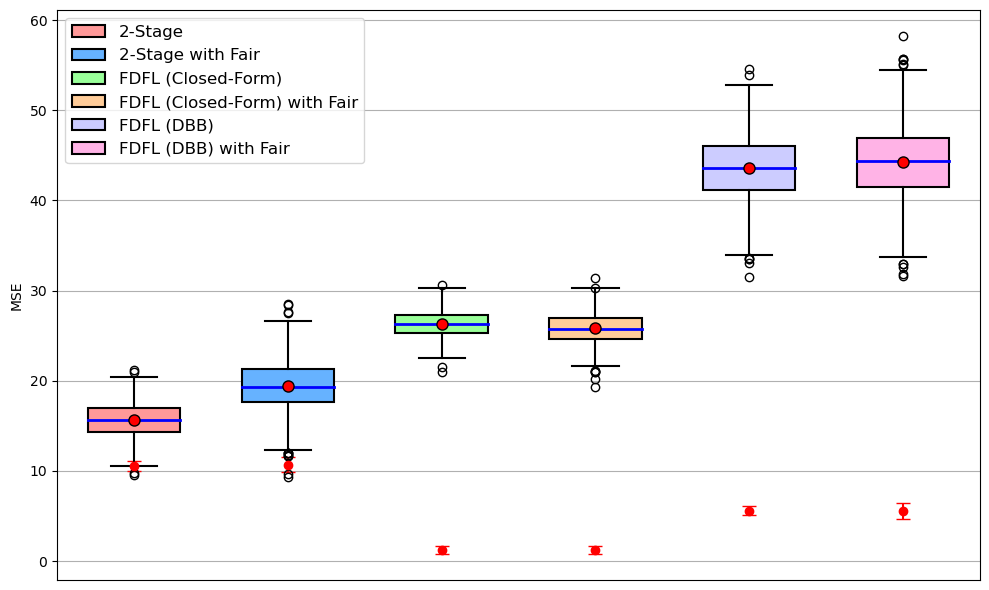

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Labels and data
labels = [
    '2-Stage', 
    '2-Stage with Fair', 
    'FDFL (Closed-Form)', 
    'FDFL (Closed-Form) with Fair', 
    'FDFL (DBB)', 
    'FDFL (DBB) with Fair'
]

# Creating a box plot with additional features
x_positions = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

# Draw box plot with means and error bars
boxprops = dict(color="black", linewidth=1.5)
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red', markersize=8)
medianprops = dict(color='blue', linewidth=2)
capprops = dict(color="black", linewidth=1.5)
whiskerprops = dict(color="black", linewidth=1.5)

# Plotting mean and standard deviation
for i, (mean, std) in enumerate(zip(regret_means, regret_stds)):
    ax.errorbar(x_positions[i], mean, yerr=std, fmt='o', color='red', capsize=5)

# Generate fake boxplot data to display interquartile ranges
data = [np.random.normal(mean, std, 1000) for mean, std in zip(mse_means, mse_stds)]
box = ax.boxplot(data, positions=x_positions, widths=0.6, 
                 patch_artist=True, 
                 boxprops=boxprops, 
                 meanprops=meanprops, 
                 medianprops=medianprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 showmeans=True)

# Set box colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF', '#FFB3E6']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# show legend as the labels
ax.legend([box["boxes"][i] for i in range(len(labels))], labels, loc='upper left', fontsize='large')
ax.grid(axis='y')

# set y label as 'regret'
ax.set_ylabel('MSE')
ax.set_xticks([])
# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


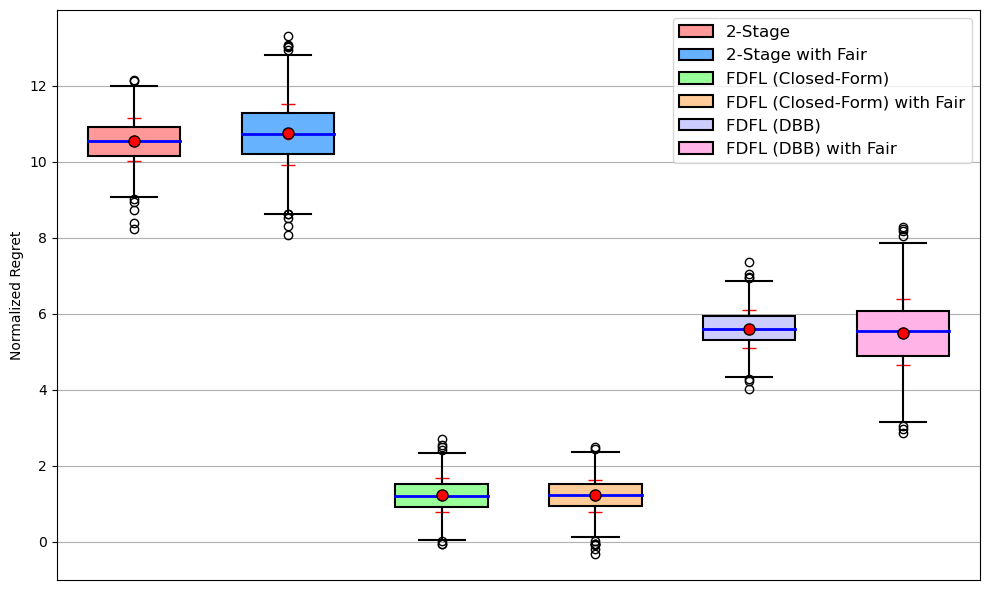

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Labels and data
labels = [
    '2-Stage', 
    '2-Stage with Fair', 
    'FDFL (Closed-Form)', 
    'FDFL (Closed-Form) with Fair', 
    'FDFL (DBB)', 
    'FDFL (DBB) with Fair'
]

# Creating a box plot with additional features
x_positions = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

# Draw box plot with means and error bars
boxprops = dict(color="black", linewidth=1.5)
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red', markersize=8)
medianprops = dict(color='blue', linewidth=2)
capprops = dict(color="black", linewidth=1.5)
whiskerprops = dict(color="black", linewidth=1.5)

# Plotting mean and standard deviation
for i, (mean, std) in enumerate(zip(regret_means, regret_stds)):
    ax.errorbar(x_positions[i], mean, yerr=std, fmt='o', color='red', capsize=5)

# Generate fake boxplot data to display interquartile ranges
data = [np.random.normal(mean, std, 1000) for mean, std in zip(regret_means, regret_stds)]
box = ax.boxplot(data, positions=x_positions, widths=0.6, 
                 patch_artist=True, 
                 boxprops=boxprops, 
                 meanprops=meanprops, 
                 medianprops=medianprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 showmeans=True)

# Set box colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF', '#FFB3E6']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# show legend as the labels
ax.legend([box["boxes"][i] for i in range(len(labels))], labels, loc='upper right', fontsize='large')
# make legend slightly larger
# show grid
ax.grid(True)
# set y label as 'regret'
ax.set_ylabel('Normalized Regret')
ax.set_xticks([])
# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


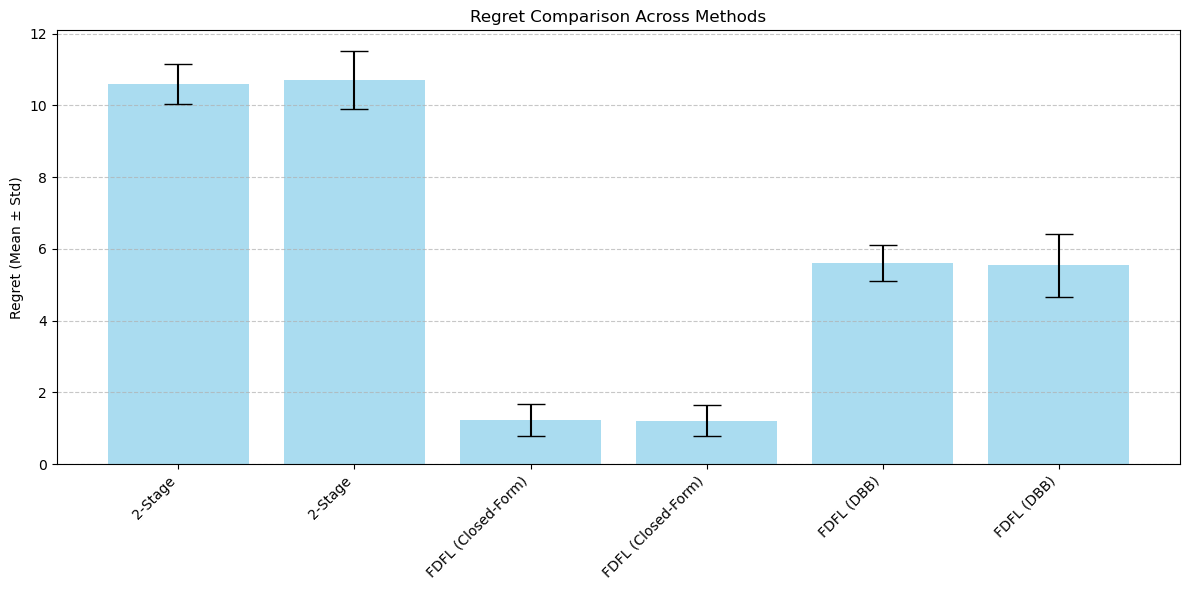

In [23]:


# Plot the regret comparison
x_pos = np.arange(len(methods))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, regret_means, yerr=regret_stds, align='center', alpha=0.7, capsize=10, color='skyblue')
plt.xticks(x_pos, methods, rotation=45, ha='right')
plt.ylabel('Regret (Mean ± Std)')
plt.title('Regret Comparison Across Methods')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


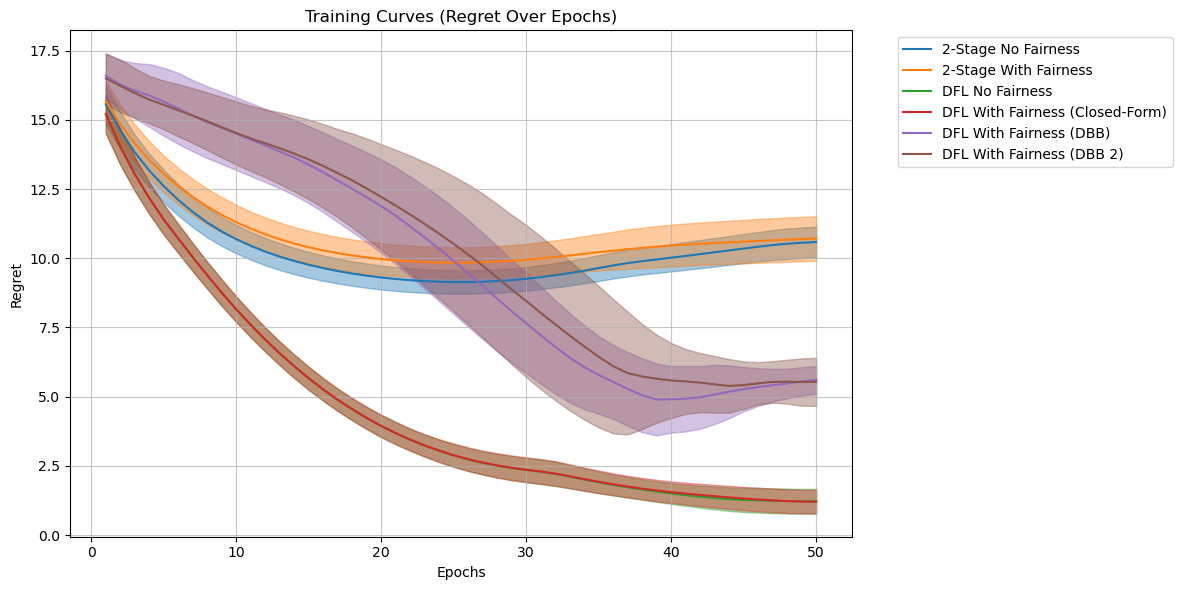

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Define epochs
epochs = np.arange(1, len(results_pfl_no_fair['mean_test_regret']) + 1)

# Define a color palette that is more distinguishable
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(12, 6))

# Plot regret for all methods with different colors
plt.plot(epochs, results_pfl_no_fair['mean_test_regret'], label='2-Stage No Fairness', color=colors[0])
plt.fill_between(epochs, 
                 results_pfl_no_fair['mean_test_regret'] - results_pfl_no_fair['std_test_regret'],
                 results_pfl_no_fair['mean_test_regret'] + results_pfl_no_fair['std_test_regret'], 
                 alpha=0.4, color=colors[0])

plt.plot(epochs, results_pfl_with_fair['mean_test_regret'], label='2-Stage With Fairness', color=colors[1])
plt.fill_between(epochs, 
                 results_pfl_with_fair['mean_test_regret'] - results_pfl_with_fair['std_test_regret'],
                 results_pfl_with_fair['mean_test_regret'] + results_pfl_with_fair['std_test_regret'], 
                 alpha=0.4, color=colors[1])

plt.plot(epochs, results_dfl_no_fair['mean_test_regret'], label='DFL No Fairness', color=colors[2])
plt.fill_between(epochs, 
                 results_dfl_no_fair['mean_test_regret'] - results_dfl_no_fair['std_test_regret'],
                 results_dfl_no_fair['mean_test_regret'] + results_dfl_no_fair['std_test_regret'], 
                 alpha=0.4, color=colors[2])

plt.plot(epochs, results_dfl_with_fair['mean_test_regret'], label='DFL With Fairness (Closed-Form)', color=colors[3])
plt.fill_between(epochs, 
                 results_dfl_with_fair['mean_test_regret'] - results_dfl_with_fair['std_test_regret'],
                 results_dfl_with_fair['mean_test_regret'] + results_dfl_with_fair['std_test_regret'], 
                 alpha=0.4, color=colors[3])

plt.plot(epochs, results_dfl_with_fair_fin_diff_1['mean_test_regret'], label='DFL With Fairness (DBB)', color=colors[4])
plt.fill_between(epochs, 
                 results_dfl_with_fair_fin_diff_1['mean_test_regret'] - results_dfl_with_fair_fin_diff_1['std_test_regret'],
                 results_dfl_with_fair_fin_diff_1['mean_test_regret'] + results_dfl_with_fair_fin_diff_1['std_test_regret'], 
                 alpha=0.4, color=colors[4])

plt.plot(epochs, results_dfl_with_fair_fin_diff_2['mean_test_regret'], label='DFL With Fairness (DBB 2)', color=colors[5])
plt.fill_between(epochs, 
                 results_dfl_with_fair_fin_diff_2['mean_test_regret'] - results_dfl_with_fair_fin_diff_2['std_test_regret'],
                 results_dfl_with_fair_fin_diff_2['mean_test_regret'] + results_dfl_with_fair_fin_diff_2['std_test_regret'], 
                 alpha=0.4, color=colors[5])

plt.xlabel('Epochs')
plt.ylabel('Regret')
plt.title('Training Curves (Regret Over Epochs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


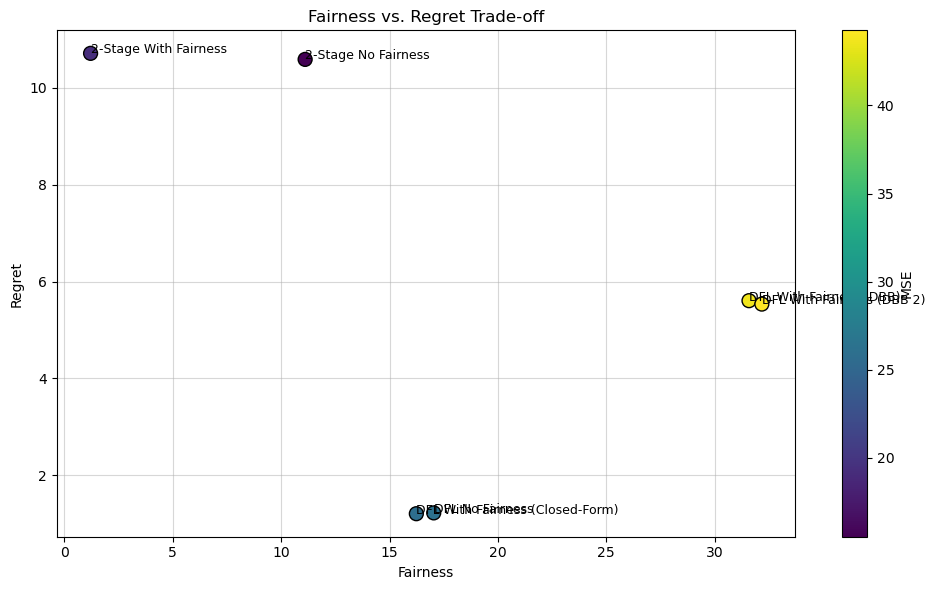

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
methods = ['2-Stage No Fairness', '2-Stage With Fairness', 'DFL No Fairness',
           'DFL With Fairness (Closed-Form)', 'DFL With Fairness (DBB)', 'DFL With Fairness (DBB 2)']

fairness_means = [
    results_pfl_no_fair['mean_test_fair'][-1],
    results_pfl_with_fair['mean_test_fair'][-1],
    results_dfl_no_fair['mean_test_fair'][-1],
    results_dfl_with_fair['mean_test_fair'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_fair'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_fair'][-1],
]

regret_means = [
    results_pfl_no_fair['mean_test_regret'][-1],
    results_pfl_with_fair['mean_test_regret'][-1],
    results_dfl_no_fair['mean_test_regret'][-1],
    results_dfl_with_fair['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_regret'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_regret'][-1],
]

mse_means = [
    results_pfl_no_fair['mean_test_mse'][-1],
    results_pfl_with_fair['mean_test_mse'][-1],
    results_dfl_no_fair['mean_test_mse'][-1],
    results_dfl_with_fair['mean_test_mse'][-1],
    results_dfl_with_fair_fin_diff_1['mean_test_mse'][-1],
    results_dfl_with_fair_fin_diff_2['mean_test_mse'][-1],
]

# Scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(fairness_means, regret_means, c=mse_means, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(sc, label='MSE')
for i, method in enumerate(methods):
    plt.text(fairness_means[i], regret_means[i], method, fontsize=9)

plt.xlabel('Fairness')
plt.ylabel('Regret')
plt.title('Fairness vs. Regret Trade-off')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
